# Mathematical Underpinnings - Lab 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed(997)

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

**Answer:**

$$R(a,a^*)=$$
$$=\mathbb{E}\mathcal{L}(f(X),Y)=$$
$$=\mathbb{E}(aX-(X+\varepsilon))^2=$$
$$=\mathbb{E}(a^2X^2-2aX(X+\varepsilon)+(X+\varepsilon)^2)=$$
$$=\mathbb{E}(a^2X^2-2aX^2-2aX\varepsilon+X^2+2X\varepsilon+\varepsilon^2)=$$
$$=\mathbb{E}((a-1)^2X^2-2(a-1)X\varepsilon+\varepsilon^2)=$$
$$=(a-1)^2\mathbb{E}X^2-2(a-1)\mathbb{E}X\varepsilon+\mathbb{E}\varepsilon^2=$$
$$=(a-1)^2\mathbb{E}X^2-2(a-1)\mathbb{E}X\mathbb{E}\varepsilon+\sigma^2\mathbb{E}Z^2=$$
$$=(a-1)^2+\sigma^2$$

It is easy to see that $a^*=1$.

The minimum does not depend on $\sigma^2$. 

In [2]:
def calc_population_risk(a, sigma_eps):
    return (a - 1) ** 2 + sigma_eps**2

### b)

In [3]:
n = 50
sigma_eps = 1


def gen_data(n, sigma_eps):
    x = np.random.standard_normal(n)
    eps = np.random.normal(0, sigma_eps, n)
    y = x + eps
    return x, y


x, y = gen_data(n, sigma_eps)

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [4]:
def calc_empirical_risk(a, x, y):
    return np.mean((a * x - y) ** 2)

### c)

**Answer:**

$$\hat{R}(a,a^*)=\frac{\sum_{i=1}^n(ax_i-y_i)^2}{n}=\frac{\sum_{i=1}^n(a^2x_i^2-2ax_iy_i+y_i^2)}{n}$$
$$\hat{a}=\argmin_a\hat{R}(a,a^*)=\frac{2\sum_{i=1}^nx_iy_i/n}{2\sum_{i=1}^nx_i^2/n}=\frac{\sum_{i=1}^nx_iy_i}{\sum_{i=1}^nx_i^2}$$

In [5]:
def calc_a_hat(x, y):
    return np.sum(x * y) / np.sum(x**2)

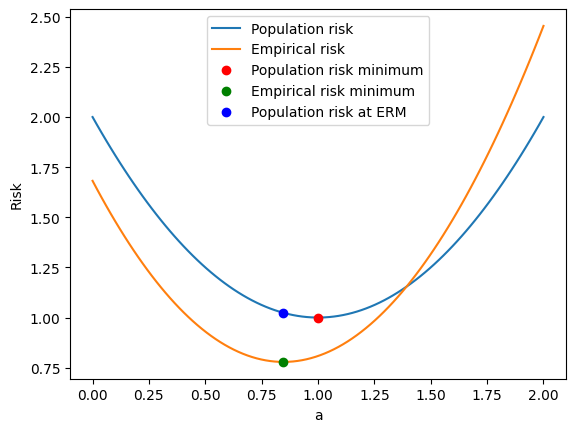

In [6]:
a_star = 1
a_hat = calc_a_hat(x, y)
a_vec = np.linspace(0, 2, 100)

population_risk_vec = [calc_population_risk(a, sigma_eps) for a in a_vec]
empirical_risk_vec = [calc_empirical_risk(a, x, y) for a in a_vec]

a_star_population_risk = calc_population_risk(a_star, sigma_eps)
a_hat_empirical_risk = calc_empirical_risk(a_hat, x, y)
a_hat_population_risk = calc_population_risk(a_hat, sigma_eps)

plt.figure()
plt.plot(a_vec, population_risk_vec, label="Population risk")
plt.plot(a_vec, empirical_risk_vec, label="Empirical risk")
plt.plot(a_star, a_star_population_risk, "ro", label="Population risk minimum")
plt.plot(a_hat, a_hat_empirical_risk, "go", label="Empirical risk minimum")
plt.plot(a_hat, a_hat_population_risk, "bo", label="Population risk at ERM")
plt.xlabel("a")
plt.ylabel("Risk")
plt.legend()
plt.show()

The green point in the above figure corresponds to the ERM estimator.

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [7]:
def calc_excess_risk(a_hat, a_star, sigma_eps):
    return calc_population_risk(a_hat, sigma_eps) - calc_population_risk(
        a_star, sigma_eps
    )

In [8]:
L = 200

unconditional_excess_risk = 0
for _ in range(L):
    x, y = gen_data(n, sigma_eps)
    a_hat = calc_a_hat(x, y)
    unconditional_excess_risk += calc_excess_risk(a_hat, a_star, sigma_eps)
unconditional_excess_risk /= L

unconditional_excess_risk

0.021279897268761835

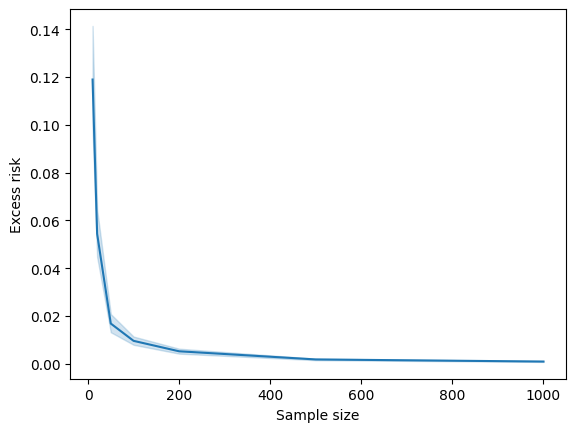

In [9]:
n_vec = [10, 20, 50, 100, 200, 500, 1000]

results = []
for n in n_vec:
    for _ in range(L):
        x, y = gen_data(n, sigma_eps)
        a_hat = calc_a_hat(x, y)
        excess_risk = calc_excess_risk(a_hat, a_star, sigma_eps)
        results.append({"n": n, "excess_risk": excess_risk})
results = pd.DataFrame(results)

plt.figure()
sns.lineplot(results, x="n", y="excess_risk")
plt.xlabel("Sample size")
plt.ylabel("Excess risk")
plt.show()

The unconditional excess risk decreases when the sample size increases.